In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
c1 = np.array([X[i] for i in range(len(y)) if y[i] == 0])
c2 = np.array([X[i] for i in range(len(y)) if y[i] == 1])
c3 = np.array([X[i] for i in range(len(y)) if y[i] == 2])

In [4]:
def cov(data):
    X = data - data.mean(axis=0, keepdims=True)
    return 1.0/len(data)*np.dot(X.transpose(), X)

In [5]:
a1, cov1 = c1.mean(axis=0), cov(c1)
a2, cov2 = c2.mean(axis=0), cov(c2)
a3, cov3 = c3.mean(axis=0), cov(c3)

## Матожидания: 

In [6]:
print a1
print a2
print a3

[ 5.006  3.418  1.464  0.244]
[ 5.936  2.77   4.26   1.326]
[ 6.588  2.974  5.552  2.026]


## Матрицы ковариаций:

In [7]:
print cov1, '\n\n'
print cov2, '\n\n'
print cov3

[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]] 


[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]] 


[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


In [8]:
from scipy.stats import multivariate_normal
import matplotlib.cm as cm
import matplotlib.mlab as mlab

def countur(pdf, data, i, j):
    imin, imax, jmin, jmax = np.min(data[:,i]), np.max(data[:,i]), np.min(data[:,j]), np.max(data[:,j])
    imin, imax = imin - 0.05*(imax-imin), imax + 0.05*(imax-imin)
    jmin, jmax = jmin - 0.05*(jmax-jmin), jmax + 0.05*(jmax-jmin)
    X, Y = np.meshgrid(np.linspace(imin, imax, 1000), np.linspace(jmin, jmax, 1000))
    Z = np.zeros_like(X)
    for k in range(X.shape[0]):
        for l in range(Y.shape[1]):
            Z[k][l] = pdf((X[k][l], Y[k][l]))
                
    plt.figure()
    plt.scatter(data[:, i], data[:, j])  
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('coordinates (' + str(i) + '; ' + str(j) + ')', fontsize=30)
    plt.show()
    
def coord_pdf(a, cov_m, i, j):
    ij_a = np.array([a[i], a[j]])
    ij_cov = np.array([[cov_m[i][i], cov_m[i][j]], [cov_m[j][i], cov_m[j][j]]])
    rv = multivariate_normal(ij_a, ij_cov)
    return rv.pdf

def deal_with_component(data, a, cov_m):
    pdf1 = coord_pdf(a, cov_m, 0, 1)
    pdf2 = coord_pdf(a, cov_m, 1, 3)    
    pdf3 = coord_pdf(a, cov_m, 2, 3)    
    countur(pdf1, data, 0, 1)
    countur(pdf2, data, 1, 3)
    countur(pdf3, data, 2, 3)

## Компонента 0

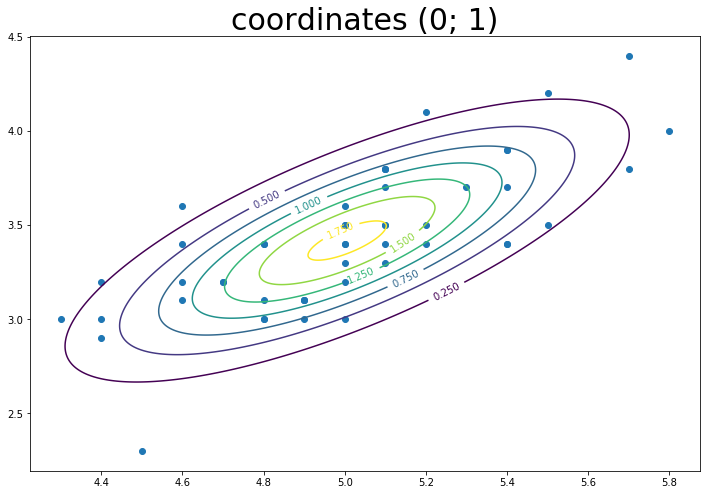

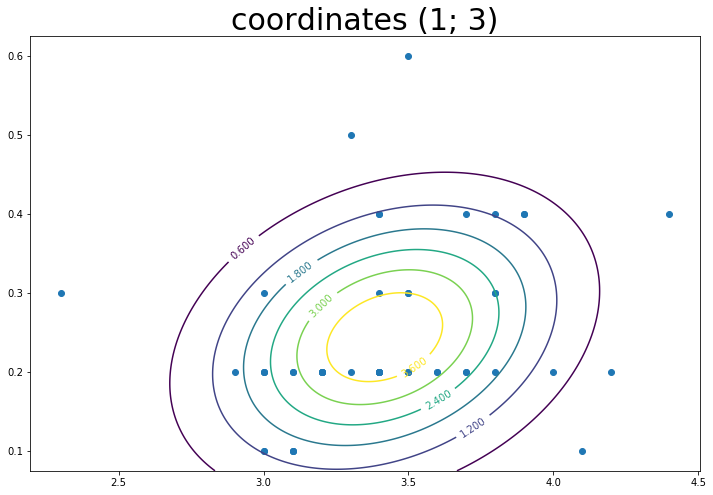

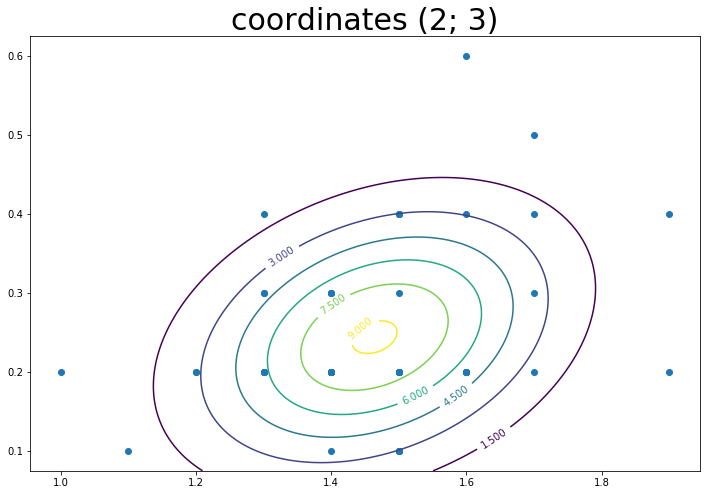

In [10]:
deal_with_component(c1, a1, cov1)

## Компонента 1

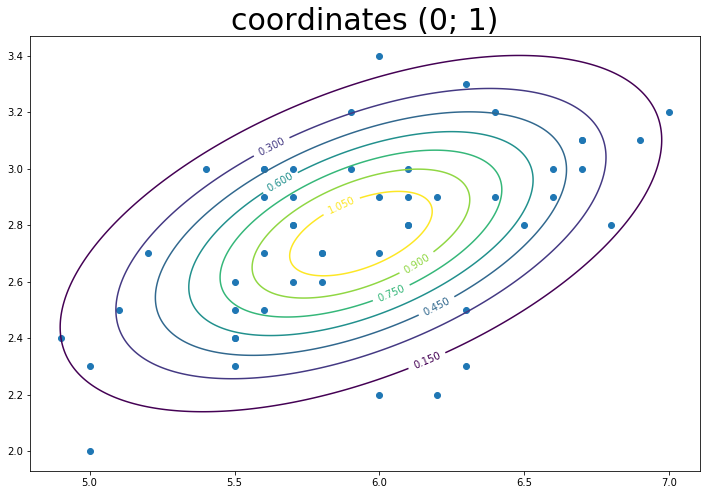

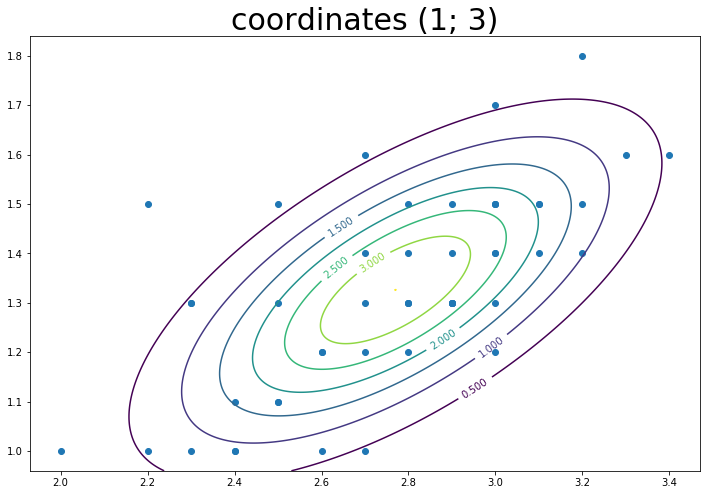

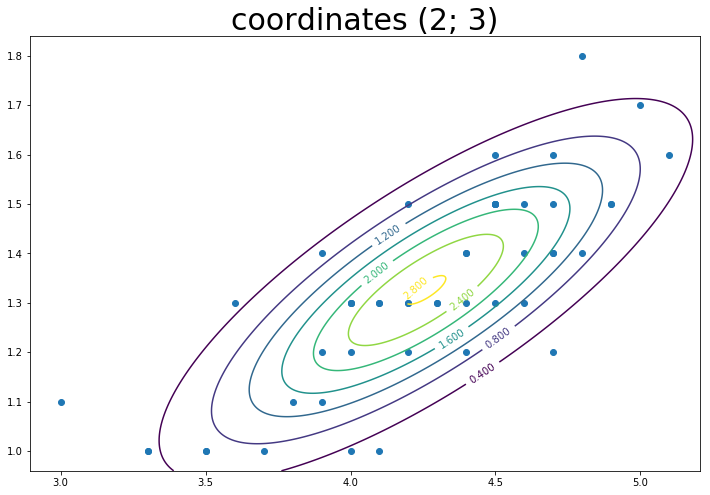

In [11]:
deal_with_component(c2, a2, cov2)

## Компонента 2

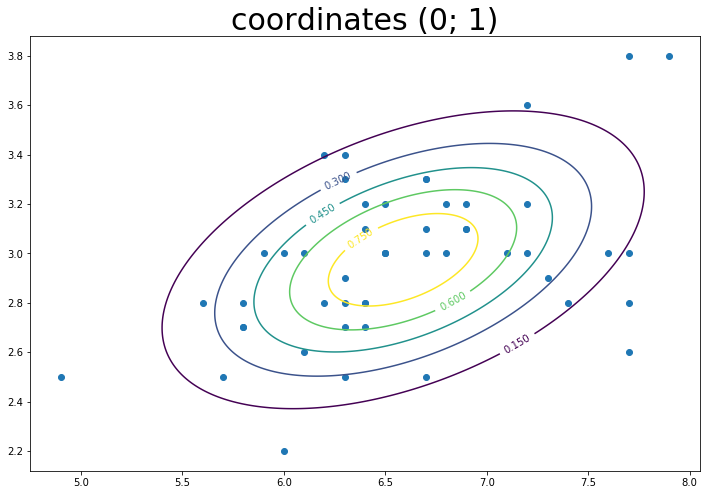

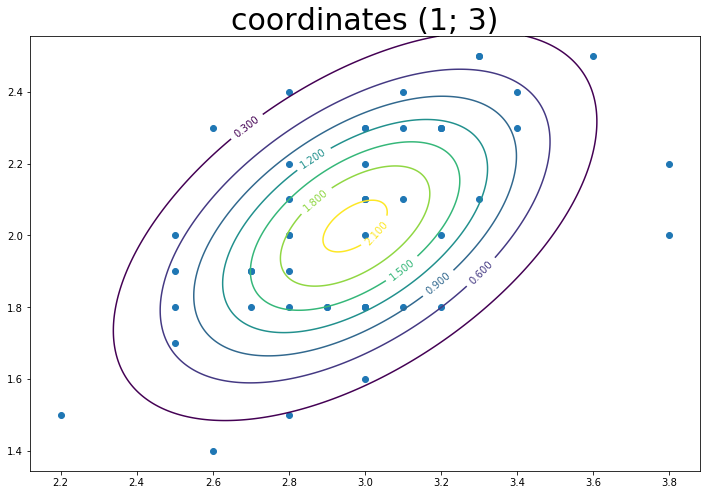

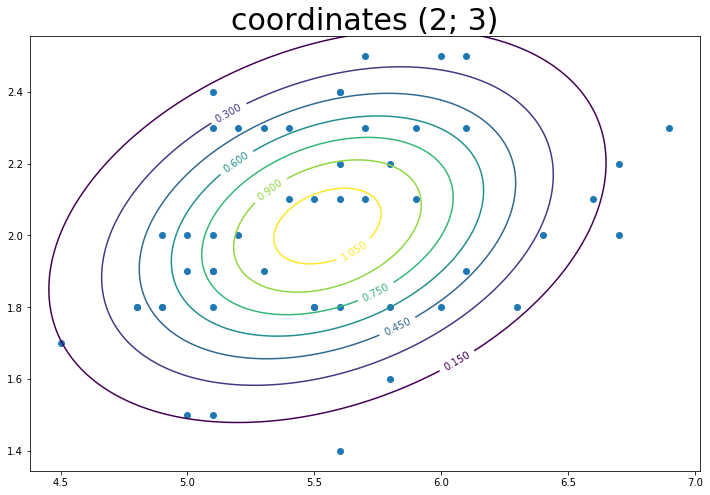

In [12]:
deal_with_component(c3, a3, cov3)

### Оценка P(t=k)

In [9]:
p1, p2, p3 = float(len(c1))/len(X), float(len(c2))/len(X), float(len(c3))/len(X)

$p(x|T \neq l) = \frac{p(x, T \neq l)}{p(T \neq l)}$ <br><br>
$p(x, T \neq l) = \sum_{k=1, k\neq l}^{3}p_k(x)P(T=k)$ <br><br>
$p(T \neq l) = \sum_{k=1, k\neq l}^{3}P(T=k)$ <br><br>
$E(x|T \neq l) = \frac{1}{p(T \neq l)}\sum_{k=1, k\neq l}^{3}a_kP(T=k)$, где $a_k$ - матожидание соответствующей компоненты

#### $E(x| T\neq 0)$ 

In [10]:
print 1.0/(p2 + p3)*(a2*p2 + a3*p3)

[ 6.262  2.872  4.906  1.676]


#### $E(x| T\neq 1)$ 

In [11]:
print 1.0/(p1 + p3)*(a1*p1 + a3*p3)

[ 5.797  3.196  3.508  1.135]


#### $E(x| T\neq 2)$ 

In [12]:
print 1.0/(p1 + p2)*(a1*p1 + a2*p2)

[ 5.471  3.094  2.862  0.785]


## Условные распределения

In [13]:
def countur(pdf, data, i, j):
    imin, imax, jmin, jmax = np.min(data[:,i]), np.max(data[:,i]), np.min(data[:,j]), np.max(data[:,j])
    imin, imax = imin - 0.05*(imax-imin), imax + 0.05*(imax-imin)
    jmin, jmax = jmin - 0.05*(jmax-jmin), jmax + 0.05*(jmax-jmin)
    X, Y = np.meshgrid(np.linspace(imin, imax, 100), np.linspace(jmin, jmax, 100))
    Z = np.zeros_like(X)
    for k in range(X.shape[0]):
        for l in range(Y.shape[1]):
            Z[k][l] = pdf((X[k][l], Y[k][l]))
                
    plt.figure() 
    CS = plt.contour(X, Y, Z)
    plt.scatter(data[:, i], data[:, j])  
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('coordinates (' + str(i) + '; ' + str(j) + ')', fontsize=30)
    plt.show()

arra, arrcov, arrp, arrdata = [a1, a2, a3], [cov1, cov2, cov3], [p1, p2, p3], [c1, c2, c3]
def deal_with_k(k):
    i, j = [n for n in range(3) if n != k-1]
    pdf1 = lambda vec: 1./(arrp[i] + arrp[j])*(arrp[i]*coord_pdf(arra[i], arrcov[i], 0, 1)(vec) + arrp[j]*coord_pdf(arra[j], arrcov[j], 0, 1)(vec))
    pdf2 = lambda vec: 1./(arrp[i] + arrp[j])*(arrp[i]*coord_pdf(arra[i], arrcov[i], 1, 3)(vec) + arrp[j]*coord_pdf(arra[j], arrcov[j], 1, 3)(vec))    
    pdf3 = lambda vec: 1./(arrp[i] + arrp[j])*(arrp[i]*coord_pdf(arra[i], arrcov[i], 2, 3)(vec) + arrp[j]*coord_pdf(arra[j], arrcov[j], 2, 3)(vec))    
    countur(pdf1, np.concatenate([arrdata[i], arrdata[j]], axis=0), 0, 1)
    countur(pdf2, np.concatenate([arrdata[i], arrdata[j]], axis=0), 1, 3)
    countur(pdf3, np.concatenate([arrdata[i], arrdata[j]], axis=0), 2, 3)

$T \neq 1$

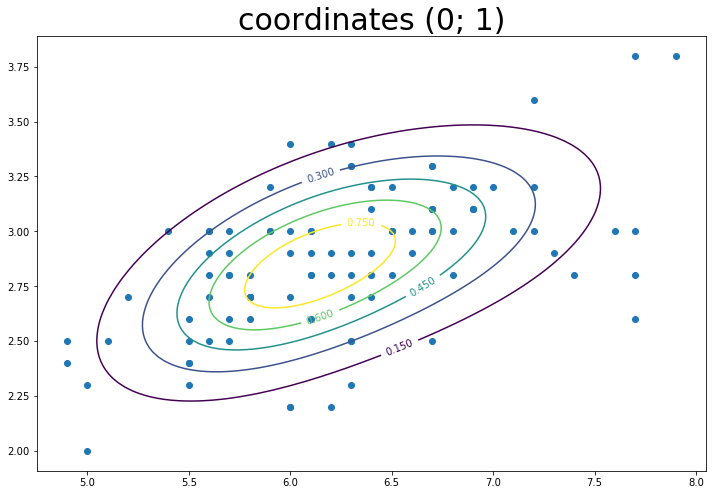

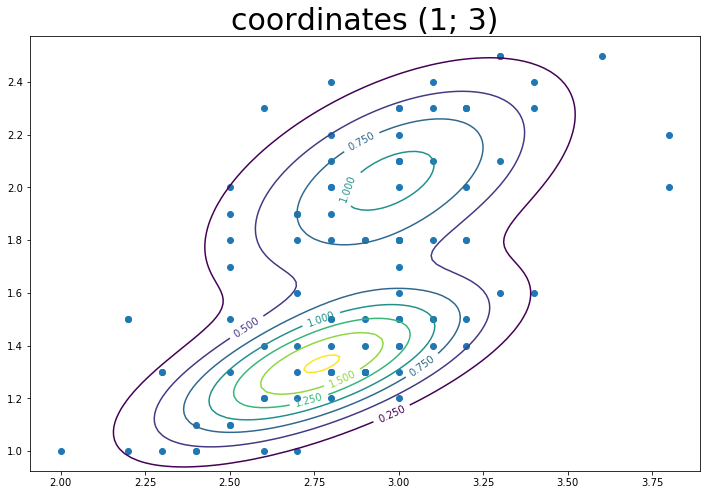

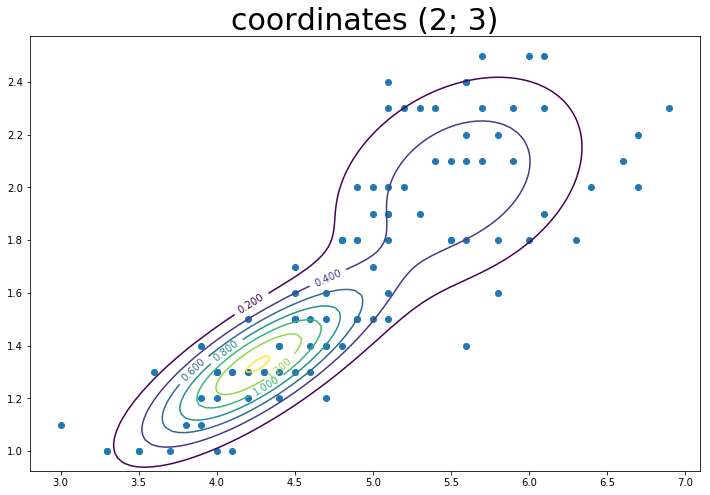

In [35]:
deal_with_k(1)

$T \neq 2$

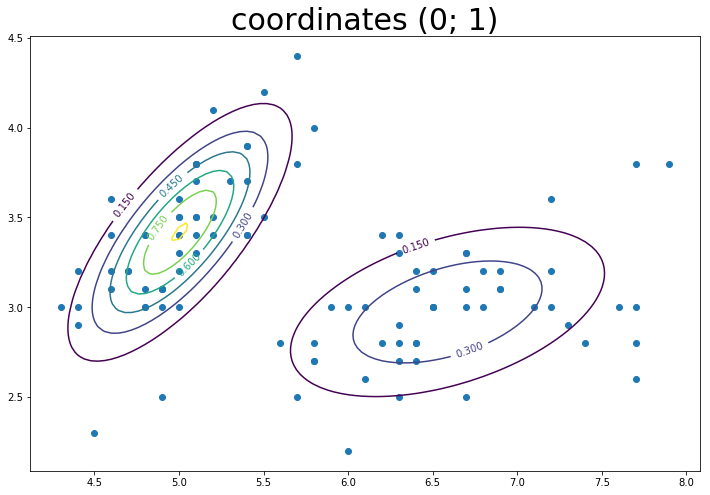

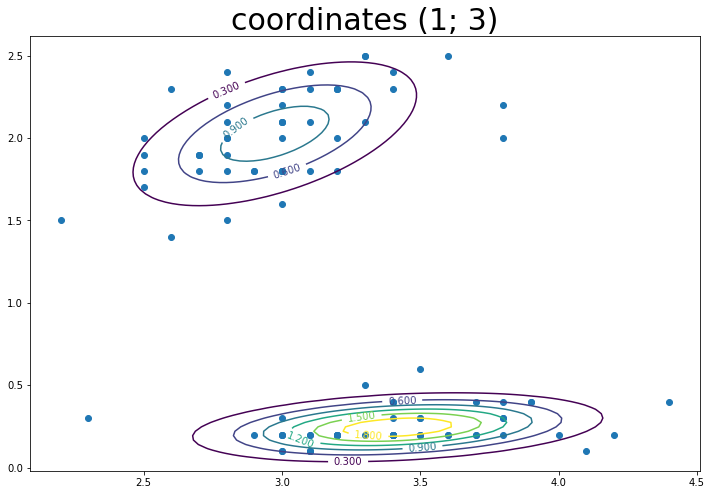

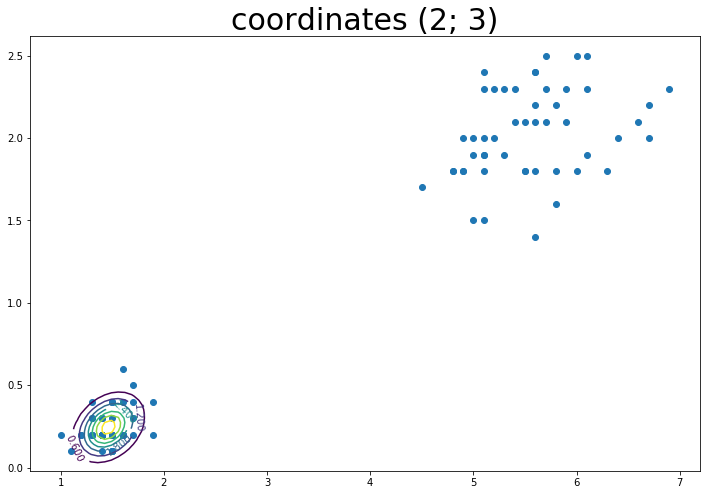

In [36]:
deal_with_k(2)

$T \neq 3$

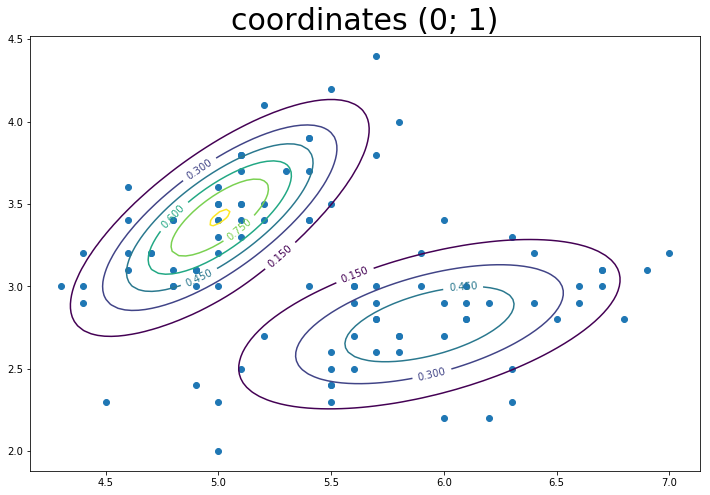

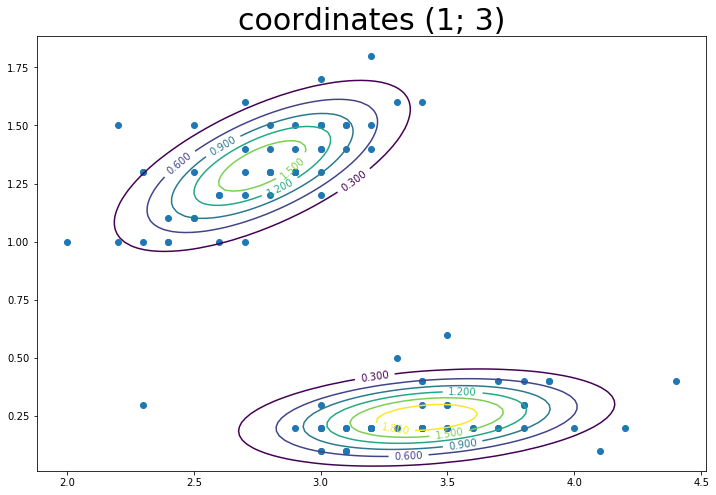

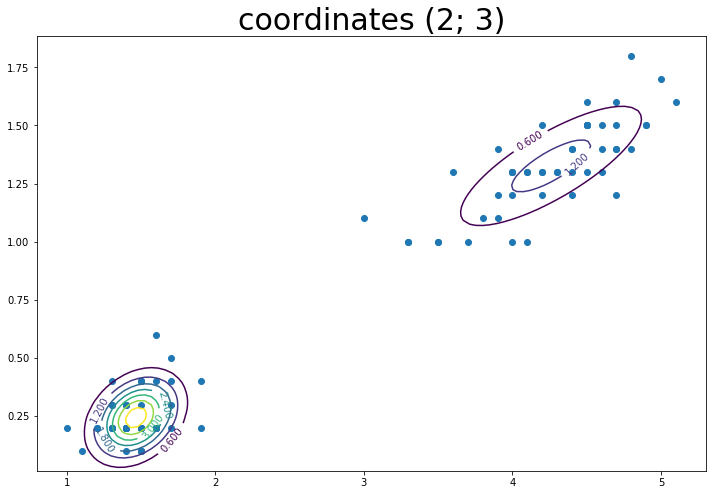

In [37]:
deal_with_k(3)

## Классификация

In [14]:
def cpdf(k):
    i, j = [n for n in range(3) if n != k-1]
    return lambda vec: 1./(arrp[i] + arrp[j])*(arrp[i]*multivariate_normal(arra[i], arrcov[i]).pdf(vec) + arrp[j]*multivariate_normal(arra[j], arrcov[j]).pdf(vec))

cpdf1, cpdf2, cpdf3 = cpdf(1), cpdf(2), cpdf(3)

Классификация по принципу $argmin_k p(X|T \neq k)$

In [15]:
classes = np.argmin(np.c_[cpdf1(X), cpdf2(X), cpdf3(X)], axis=1)

In [17]:
from sklearn.metrics import accuracy_score
print accuracy_score(y, classes)

0.98


In [ ]:
c1pdf1 = lambda vec: multivariate_normal(arra[0], arrcov[0]).pdf(vec)
c2pdf2 = lambda vec: multivariate_normal(arra[0], arrcov[0]).pdf(vec)*(p1/(p1 + p3))
c2pdf2 = lambda vec: multivariate_normal(arra[0], arrcov[0]).pdf(vec)*(p1/(p1 + p2))